In [2]:
# This notebook note produces graphs that show, keeping everything else constant, how the front and back irradiances
# are affected by the changes in the angle! Since the max angles is specified to be 45° in the description of simulate()
# method, this is the max angle I checked. 

import bifacialvf    
import os
# change directory to \bifacialvf\ root
os.chdir(os.path.dirname(bifacialvf.__file__))
%pwd

u'/Users/eleonorakiziv/Desktop/bifacialvf-master/bifacialvf'

In [ ]:

sazm = 180                  # PV Azimuth(deg)
C = 1                      # GroundClearance(panel slope lengths)
rtr = 1.5              # row to row spacing in panel lengths. 
GCR = 1.0/rtr             # Ground Cover Ratio

TMYtoread = "data/724010TYA.csv"   # VA Richmond

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
albedo = 0.62               # ground albedo beneath system
# 1-axis tracking instructions (optional)
tracking=False
backtrack=True       # backtracking optimization as defined in pvlib

beta = 1

while beta < 46: 
    writefiletitle = "data/Output/" + str(beta) 
    bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rtr=rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, )
    beta = beta+1
    

    

The bifacial ratio for beta 1 is: 19.7%
The bifacial ratio for beta 2 is: 19.2%
The bifacial ratio for beta 3 is: 18.8%
The bifacial ratio for beta 4 is: 18.3%
The bifacial ratio for beta 5 is: 17.9%
The bifacial ratio for beta 6 is: 17.6%
The bifacial ratio for beta 7 is: 17.2%
The bifacial ratio for beta 8 is: 16.9%
The bifacial ratio for beta 9 is: 16.6%
The bifacial ratio for beta 10 is: 16.3%
The bifacial ratio for beta 11 is: 16.0%
The bifacial ratio for beta 12 is: 15.7%
The bifacial ratio for beta 13 is: 15.5%
The bifacial ratio for beta 14 is: 15.3%
The bifacial ratio for beta 15 is: 15.1%
The bifacial ratio for beta 16 is: 15.0%
The bifacial ratio for beta 17 is: 14.8%
The bifacial ratio for beta 18 is: 14.7%
The bifacial ratio for beta 19 is: 14.6%
The bifacial ratio for beta 20 is: 14.5%
The bifacial ratio for beta 21 is: 14.5%
The bifacial ratio for beta 22 is: 14.5%
The bifacial ratio for beta 23 is: 14.5%
The bifacial ratio for beta 24 is: 14.5%
The bifacial ratio for be

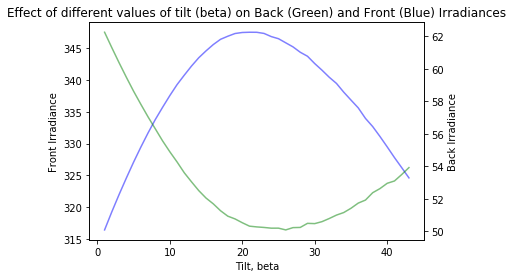

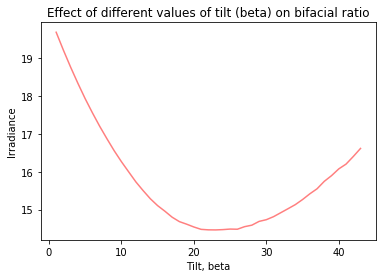

In [4]:
from loadVFresults import loadVFresults
irradiance = {};
backIrr = {};
frontIrr = {}; 


for x in xrange (1, 44):
    (data, metadata) = loadVFresults("data/Output/Angles/" + str(x))

    # calculate average front and back global tilted irradiance across the module chord
    data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
    data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

    # Print the annual bifacial ratio
    frontIrrSum = data['GTIFrontavg'].sum()
    backIrrSum = data['GTIBackavg'].sum()
    percentage = backIrrSum/frontIrrSum*100
    print('The bifacial ratio for beta {} is: {:.1f}%'.format(x, percentage))
    
    irradiance[x] = percentage
    backIrr[x] = data['GTIBackavg'].mean()
    frontIrr[x] = data['GTIFrontavg'].mean()
    
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# This is how the front and back irradiances are affected by different beta
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.set_title('Effect of different values of tilt (beta) on Back (Green) and Front (Blue) Irradiances')
ax.set_xlabel("Tilt, beta")
ax1.set_ylabel("Back Irradiance")
ax.set_ylabel("Front Irradiance")
ax.plot(list(irradiance.keys()), frontIrr.values(), 'b', alpha = 0.5)
ax1.plot(list(irradiance.keys()), backIrr.values(), 'g', alpha = 0.5)

# This is how the bofacial ration is affected by tilt 
fig2, ax2 = plt.subplots()
ax2.set_title('Effect of different values of tilt (beta) on bifacial ratio')
ax2.set_xlabel("Tilt, beta")
ax2.set_ylabel("Irradiance")
ax2.plot(list(irradiance.keys()), irradiance.values(), 'r', alpha = 0.5)


